<a href="https://colab.research.google.com/github/JMartinArocha/MasterBigData/blob/main/2%205%20Escalamiento%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo 5:** Escalamiento de datos

In [1]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))

# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

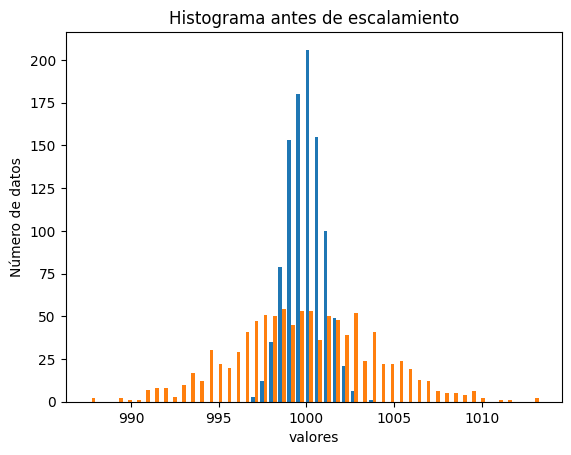

In [2]:
# Histograma antes de escalamiento
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


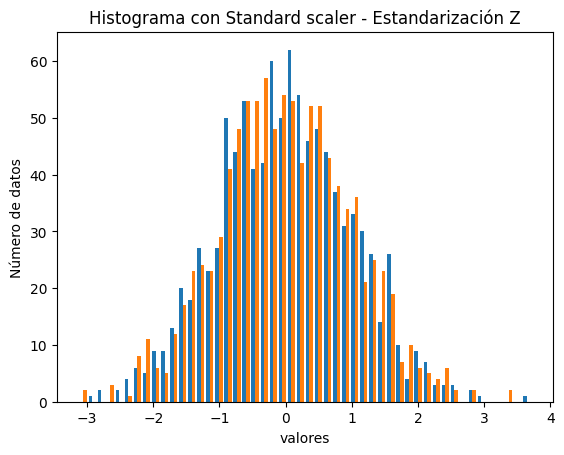

In [3]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [4]:
Data_prep_SS.std()


1.0

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



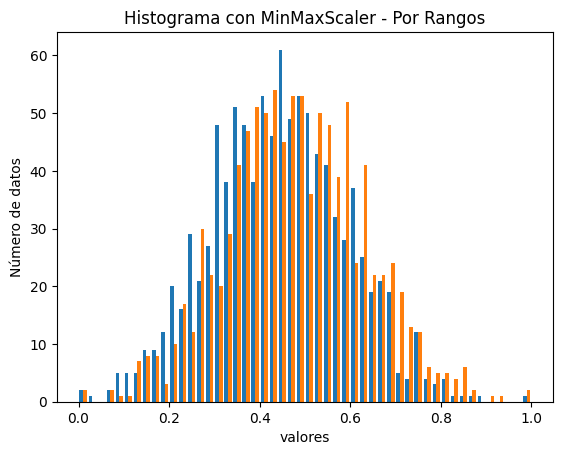

In [5]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [6]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

1.0

In [7]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

1.0

In [13]:
x = [1,2,3,4,5,6,7,8,9,10]
media = np.mean(x)
mediana = np.median(x)
desviacion_estandar = np.std(x)
varianza = np.var(x, ddof=1)
rango = np.max(x) - np.min(x)

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación Estándar Muestral: {desviacion_estandar}")
print(f"Varianza Muestral: {varianza}")
print(f"Rango: {rango}")



Media: 5.5
Mediana: 5.5
Desviación Estándar Muestral: 2.8722813232690143
Varianza Muestral: 9.166666666666666
Rango: 9


In [11]:
df = pd.DataFrame(x, columns=['Columna'])
df.describe()


,Columna
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


In [12]:
desviacion_estandar_corregido = np.std(x, ddof=1)
print("Desviación estándar con Numpy:", desviacion_estandar_corregido)


Desviación estándar con Numpy: 3.0276503540974917


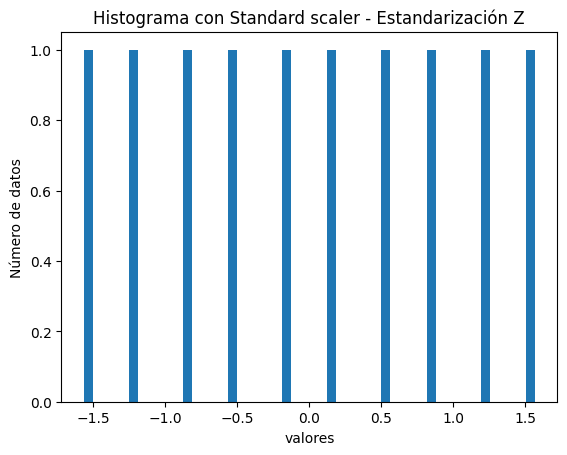

Media: -6.661338147750939e-17
Mediana: 0.0
Desviación Estándar Muestral: 1.0
Varianza Muestral: 1.1111111111111112
Rango: 3.1333978072025612


In [27]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

x_df = pd.DataFrame(x)
numeric_cols = x_df.select_dtypes(include=['float64', 'int']).columns.to_list()
# # Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
prep = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

x_df_prep_SS = prep.fit_transform(x_df)

plt.hist(x_df_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()


media = np.mean(x_df_prep_SS)
mediana = np.median(x_df_prep_SS)
desviacion_estandar = np.std(x_df_prep_SS)
varianza = np.var(x_df_prep_SS, ddof=1)
rango = np.max(x_df_prep_SS) - np.min(x_df_prep_SS)

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación Estándar Muestral: {desviacion_estandar}")
print(f"Varianza Muestral: {varianza}")
print(f"Rango: {rango}")

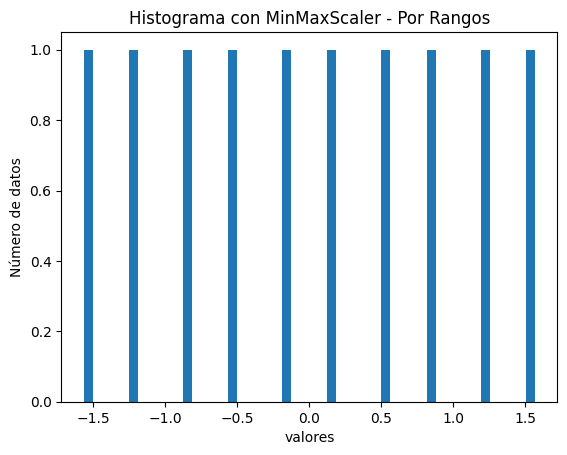

Media: -6.661338147750939e-17
Mediana: 0.0
Desviación Estándar Muestral: 1.0
Varianza Muestral: 1.1111111111111112
Rango: 3.1333978072025612


In [29]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

x_df = pd.DataFrame(x)
numeric_cols = x_df.select_dtypes(include=['float64', 'int']).columns.to_list()

# # MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

x_df_prep_RR = prep.fit_transform(x_df)

plt.hist(x_df_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()


media = np.mean(x_df_prep_RR)
mediana = np.median(x_df_prep_RR)
desviacion_estandar = np.std(x_df_prep_RR)
varianza = np.var(x_df_prep_RR, ddof=1)
rango = np.max(x_df_prep_RR) - np.min(x_df_prep_RR)

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación Estándar Muestral: {desviacion_estandar}")
print(f"Varianza Muestral: {varianza}")
print(f"Rango: {rango}")
